# Print Data Statistical Analysis 
for the BioBots Internal Team 

The Purpose of this Jupyter Notebook is to emulate the data processing and data science side of the bioprinter output. 
Though not a "web app" in the strict sense, this part of the data pipeline is essential for the BioBots internal team to fully  analyze print information and results. The conclusions from this analysis can be funneled back to the users so that they can design the best possible experiements with their machine, and back to the BioBots engineers to design a printer that offers the best results for the scientists.

To begin, I create a pandas tabular dataframe from the user info in the json file. From here we can run a quick exploratory analysis of the data to seek out any correlations or noteworthy findings that could inform better future usability or reengineering of the bioprinter. 

First let's clean and intialize the data. 

In [1]:
import os 
import json 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb #statisical plots 
plt.rcParams['figure.figsize'] = [12,10] #default fig size 

In [2]:
### Intialize data ### 
data_file = 'bioprint-data.json' #change if json file is outisde of CWD
path = os.path.join(os.getcwd(), data_file)
with open(path) as json_data:
    data = json.load(json_data) #store json data as string 
data = pd.io.json.json_normalize(data) #convert to pandas dataframe for speed and ease 

In [3]:
def col_rename(): #rename columns for easy handling ('.' more difficult to use than '_')
    cols = [] 
    for col in data.columns:
        arr = (str(col).split('.'))
        new_col = '_'.join(arr)
        cols.append(new_col)
    data.columns = cols
col_rename()
data.head(2)

,print_data_deadPercent,print_data_elasticity,print_data_livePercent,print_info_crosslinking_cl_duration,print_info_crosslinking_cl_enabled,print_info_crosslinking_cl_intensity,print_info_files_input,print_info_files_output,print_info_pressure_extruder1,print_info_pressure_extruder2,print_info_resolution_layerHeight,print_info_resolution_layerNum,print_info_wellplate,user_info_email,user_info_serial
0,84.01,49.28,7.02,22793,True,24,file_0.gcode,file_0_output.gcode,38.0,93.0,0.8,48,6,user0@gmail.com,0
1,53.09,47.42,37.42,0,False,0,file_1.gcode,file_1_output.gcode,109.0,113.0,0.2,33,96,user0@gmail.com,0


Ok! Now that the dataframe is initialized, we can begin an exploratory analysis. I'll begin with this standard workflow: 

1) Clean data - find/drop outliers, null data

2) Find any correlations 

--> If 2 brings anything up, we'll go further. 

In [4]:
#drop non-numerical data (ID, file names etc)
drop_cols = [] #remove cols with strings (cant do analysis on these)
for col in data.columns:
#     print col
    t = str(type(data[col].values[0]))
    if 'uni' in t: #unicode string 
        drop_cols.append(col)
num_data = data.drop(labels=drop_cols, axis=1)  

print num_data.shape
num_data.head(5)

(10000, 12)


,print_data_deadPercent,print_data_elasticity,print_data_livePercent,print_info_crosslinking_cl_duration,print_info_crosslinking_cl_enabled,print_info_crosslinking_cl_intensity,print_info_pressure_extruder1,print_info_pressure_extruder2,print_info_resolution_layerHeight,print_info_resolution_layerNum,print_info_wellplate,user_info_serial
0,84.01,49.28,7.02,22793,True,24,38.0,93.0,0.8,48,6,0
1,53.09,47.42,37.42,0,False,0,109.0,113.0,0.2,33,96,0
2,8.07,48.09,84.41,0,False,0,64.0,16.0,0.1,27,1,0
3,58.74,40.08,37.87,0,False,0,38.0,97.0,0.4,13,1,0
4,31.39,1.69,68.57,0,False,0,18.0,70.0,0.6,2,12,0


In [5]:
#find and drop null data 
for col in num_data.columns: #iterate through dataframe columns 
    drop_col = num_data[np.isfinite(num_data[col])] #take dataframe where finite 
    print drop_col.shape, col

(10000, 12) print_data_deadPercent
(10000, 12) print_data_elasticity
(10000, 12) print_data_livePercent
(10000, 12) print_info_crosslinking_cl_duration
(10000, 12) print_info_crosslinking_cl_enabled
(10000, 12) print_info_crosslinking_cl_intensity
(10000, 12) print_info_pressure_extruder1
(10000, 12) print_info_pressure_extruder2
(10000, 12) print_info_resolution_layerHeight
(10000, 12) print_info_resolution_layerNum
(10000, 12) print_info_wellplate
(10000, 12) user_info_serial


Looks like their is no null data, since column shapes stay constant at the 'isfinite' check, so no need to drop any rows. 

For the data analysis, I'll start visually. I'll use two plots: 

1) Boxplots - show spread of data and visualize any outliers

2) Kernel Density Estimations (probability density function) - show distribution of data and check for normality, which determines how much we can trust any statistical tests later 

print_data_deadPercent


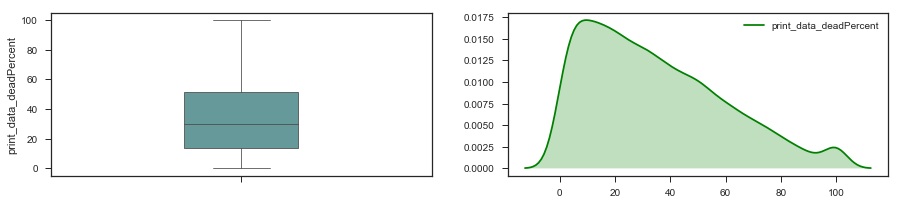

print_data_elasticity


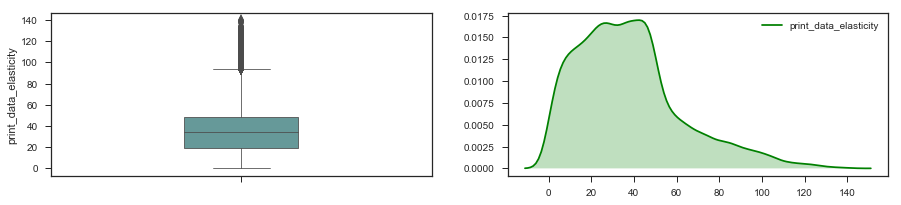

print_data_livePercent


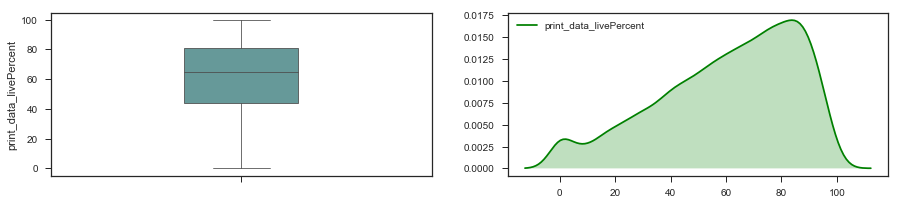

print_info_crosslinking_cl_duration


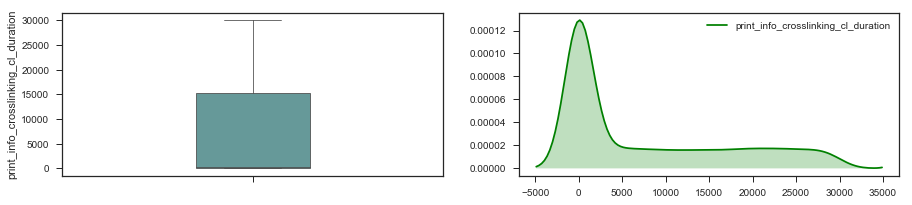

print_info_crosslinking_cl_enabled


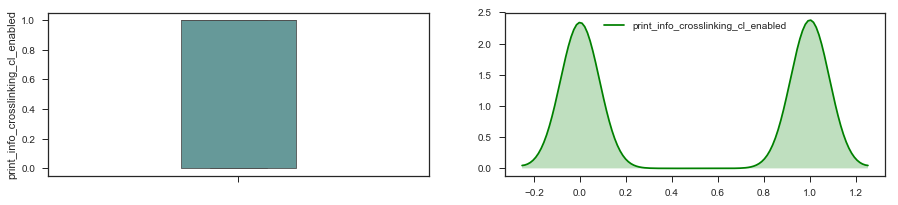

print_info_crosslinking_cl_intensity


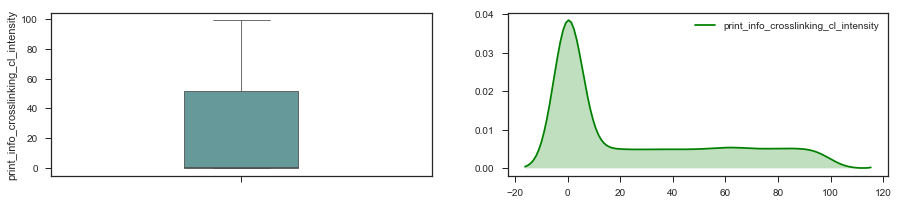

print_info_pressure_extruder1


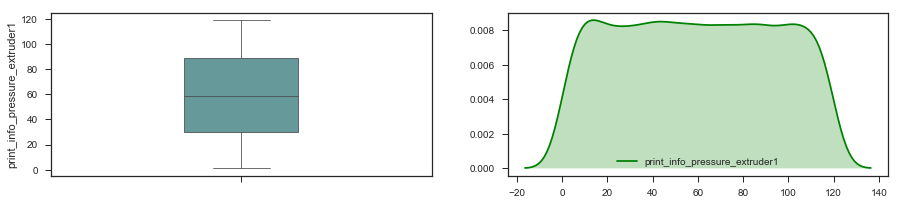

print_info_pressure_extruder2


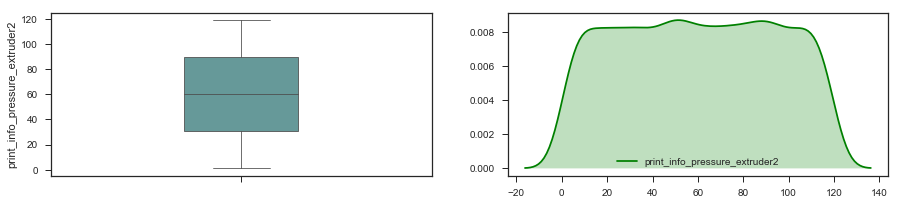

print_info_resolution_layerHeight


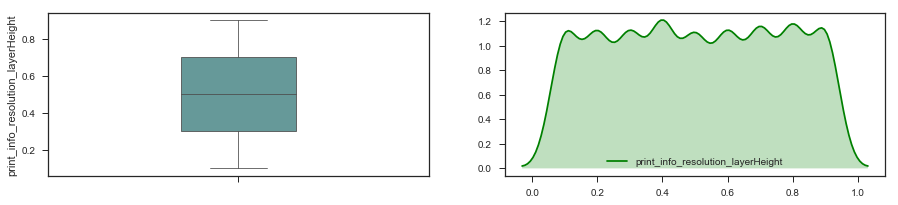

print_info_resolution_layerNum


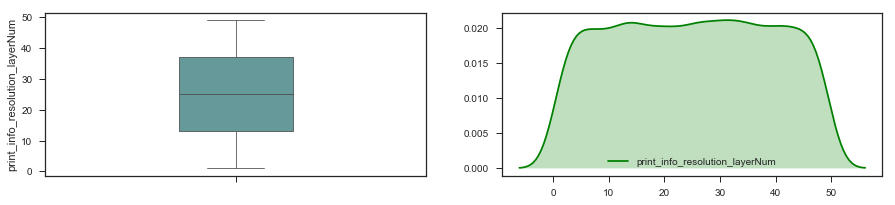

print_info_wellplate


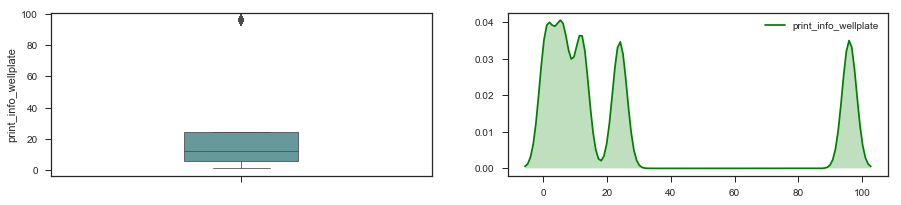

user_info_serial


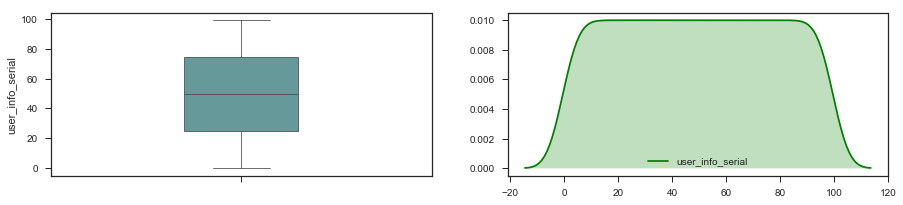

In [6]:
sb.set_style("ticks") #for pretty figures
for i, col in enumerate(num_data):
    print col
    fig = plt.figure(figsize=(15, 3))
    ax1 = fig.add_subplot(1,2,1)
    sb.boxplot(num_data[col], 
               orient='v',
               linewidth =0.8,
               width=0.3,
               color ='cyan',
               saturation=0.2,
               fliersize=8,
              )
    
    ax2 = fig.add_subplot(1,2,2)
    sb.kdeplot(num_data[col],
               legend=True, 
               shade=True, color='g'
              ) 
    plt.show()

What did we see? My observations: 

1) The live/dead cell percents are fat tailed distributions, with cells more likely to die. 

2) Elasticty has many outliers at the high end.

3) Pressure, layer height, and resolution all look to be uniform distributions. 

4) It could be useful to remove observations where Crosslinking is turned off, to further examine the effects of it turned on. 

Next, lets visualize the correlations in the data to see if certain parameters might effect the other. This information could be used to inform the users and our engineers on how to better design experiments and settings to optimize results. 

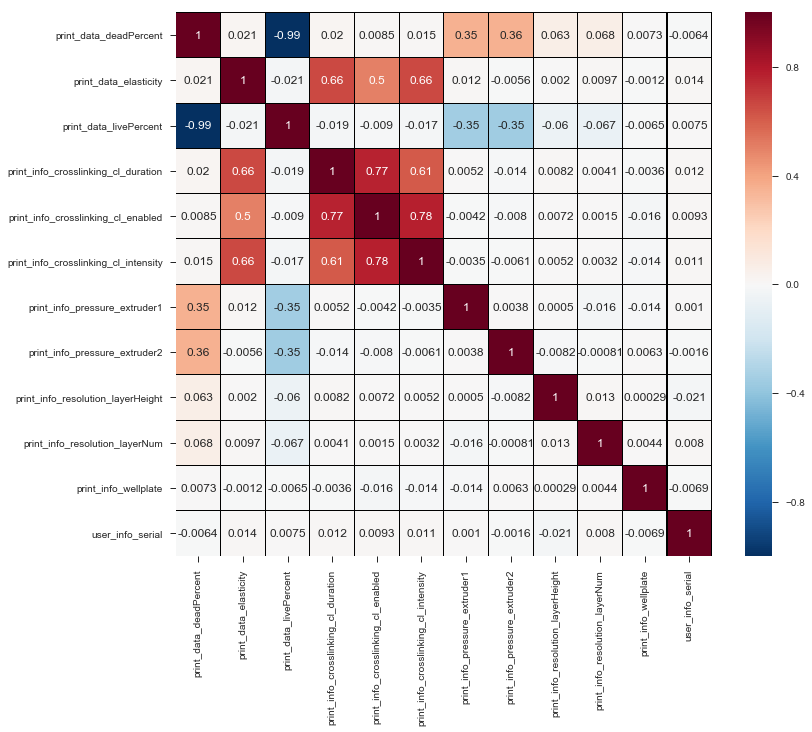

In [7]:
#A correlation matrix of all numerical data from the printer
corr = num_data.corr()
sb.heatmap(corr, 
    xticklabels=corr.columns.values,
    yticklabels=corr.columns.values,
    annot=True,
    linewidths=0.1,
    linecolor='black',           
    )
plt.show()
corr; #remove semicolon to view raw data

Interesting! What stands out to me most is: 

1) Cell viability (living/dead) has some correlation with extrusion pressure (see 0.35 values). 

2) Cross linking is correlated to elasticity. 

This second feature is expected biologically, since crosslinking increases polymerization of longer molecules, but its good to see a statistical validation. 

Let's go further with the cell viability question with a linear regression. I recall that we had a fat-tailed distribution with this parameter. But 10000 observations should be enough to satisfy the central limit theorem, which says that when enough random variables are added together (regardless of their underlying distribution) still average out to a normal distribution, which is what OLS assumes when estimating results, like p values and regression coefficients. 

TLDR we can trust our results. 

In [11]:
import statsmodels.formula.api as sm
y = num_data['print_data_livePercent'] #dependent variable 
x = num_data['print_info_pressure_extruder1'] #independent variable 
result = sm.ols(formula=  "y~x" , data=num_data).fit()
print 'LIVING CELL % ~ PRESSURE OF EXTRUDER 1'
#print result.summary()
print result.params
print 'p-value (x) =', result.pvalues['x']

print '\n'

y = num_data['print_data_livePercent'] #dependent variable 
x = num_data['print_info_pressure_extruder2'] #independent variable 
result = sm.ols(formula=  "y~x" , data=num_data).fit()
print 'LIVING CELL % ~ PRESSURE OF EXTRUDER 2'
#print result.summary()
print result.params
print 'p-value (x) =', result.pvalues['x']

LIVING CELL % ~ PRESSURE OF EXTRUDER 1
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.120
Model:                            OLS   Adj. R-squared:                  0.120
Method:                 Least Squares   F-statistic:                     1360.
Date:                Wed, 14 Jun 2017   Prob (F-statistic):          3.39e-279
Time:                        17:36:06   Log-Likelihood:                -45715.
No. Observations:               10000   AIC:                         9.143e+04
Df Residuals:                    9998   BIC:                         9.145e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept    

Alright. From the linear regressions above we can see that the relationships between the dependent y variable, 'cells living', and the independent x variables 'extruder pressure 1 & 2' are signficant, since their p-values are less than 0.05. This means that for an increase in 1 psi, we expect to see a decrease of roughly 0.25% cell viability. Something to keep in mind! You can uncomment the "print result.summary()" lines to see the full statisical analysis.

The plot below shows the trend.

Note the high variance.


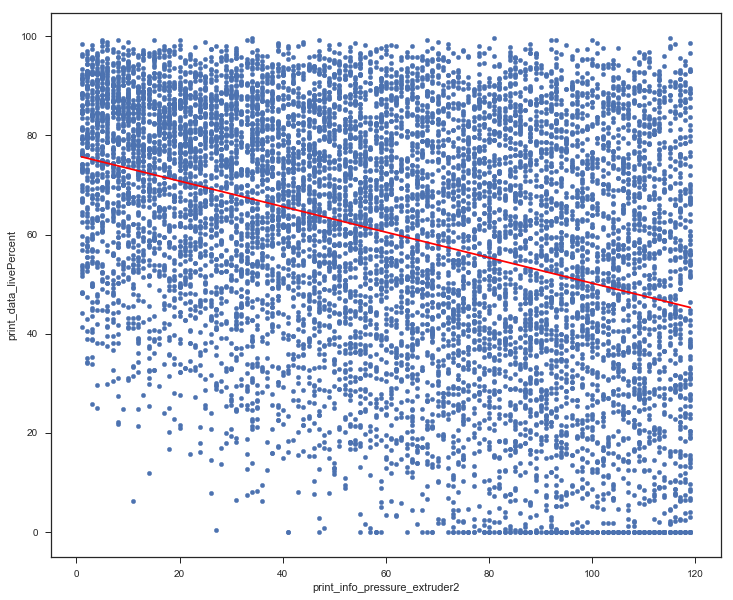

In [9]:
num_data.plot(kind='scatter', 
            y ='print_data_livePercent', 
            x='print_info_pressure_extruder2')

#best fit line 
x_vals = np.linspace(x.min(), x.max(), 100)
y_vals = (result.params[1]*x_vals) + result.params[0] #y=mx+b

plt.plot(x_vals, y_vals, c='red')
plt.show()

Looking further into your docs, its clear that shear stress increaseas as a function of extruder pressure, which in turn affects the final viability of a construct.

A future implementation from this conclusion could be a machine learning web tool that analyzes a large number of experiments of a user, and makes custom suggestions to change nozzle diameter, extruder pressure, or material viscosity to increase cell viability.

https://www.biobots.io/biowiki/shear-stress-affects-viability/